<center>
<img src="logo.png" height="900"> 
</center>


#  Береги уровень значимости с молоду 

В этой тетрадке мы будем работать с данными про Баскетбол. 

In [1]:
import numpy as np
import pandas as pd
from scipy import stats as sts
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

В файле `basketball.tsv` лежит [статистика о штрафных бросках в играх в Баскетбол, собранная с сайта ESPN.com](https://www.kaggle.com/sebastianmantey/nba-free-throws)

In [2]:
df = pd.read_csv('data/basketball.tsv', sep='\t')
print(df.shape)
df.head( )

(618019, 13)


,end_result,game,game_id,period,play,player,playoffs,score,season,shot_made,time,command,is_home
0,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,0 - 1,2006 - 2007,1,11:45,LAL,False
1,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 2 of 2,Andrew Bynum,regular,0 - 2,2006 - 2007,1,11:45,LAL,False
2,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,18 - 12,2006 - 2007,1,7:26,LAL,False
3,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum misses free throw 2 of 2,Andrew Bynum,regular,18 - 12,2006 - 2007,0,7:26,LAL,False
4,106 - 114,PHX - LAL,261031013.0,1.0,Shawn Marion makes free throw 1 of 1,Shawn Marion,regular,21 - 12,2006 - 2007,1,7:18,PHX,True


__Описание колонок:__

* `end_result` - результат игры
* `game` - какие команды играли, команда справа - хозяин площадки
* `game_id` - уникальный id игры
* `period` - период
* `player` - имя игрока
* `playoff` - тип игры
* `score` - счёт после броска 
* `season` - сезон игры
* `shot_made` - попал или не попал в кольцо при броске 
* `time` - время броска 
* `command` - предполагаемая команда игрока (колонка рассчитана по датасету)
* `is_home` - домашний матч или в гостях

# 1. Доля попаданий в корзину

Немного посмотрим на наши данные. Ответьте на следующие вопросы и запишите ответы в соотвествующие переменные. 

Сколько уникальных игр было сыграно в течение всего периода, который есть в таблице (`ans1`)? Сколько в данных встречается уникальных игроков (`ans2`)?

In [3]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

ans1 = ...
ans2 = ...

# your code here

ans1 = df['game_id'].nunique()
ans2 = df['player'].nunique()


In [4]:
# проверка того, что задание решено верно
assert ans1 == 12874

# Другие подобные тесты скрыты от вас

Подсчитайте по каждому игроку статистику, связанную с тем, как часто он попадет в корзину при бросках:

- Долю попаданий в корзину среди его бросков, $\hat{p}$
- Число бросков, которое было сделано игроком, $n$

Среди игроков, которые сделали более ста бросков, найдите самого успешного. Запишите его в переменную `ans3`.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

ans3 = ...

# your code here

player_stats = df.groupby('player')['shot_made'].agg(['mean', 'count'])
filtered_players = player_stats[player_stats['count'] > 100]
ans3 = filtered_players['mean'].idxmax()

                        mean  count
player                             
A.J. Price          0.748227    282
Aaron Brooks        0.836790   1109
Aaron Gordon        0.681102    254
Aaron Gray          0.557522    339
Acie Law            0.781659    229
...                      ...    ...
Yi Jianlian         0.778746    574
Zach LaVine         0.815789    380
Zach Randolph       0.765154   3415
Zaza Pachulia       0.752208   2038
Zydrunas Ilgauskas  0.789357    902

[670 rows x 2 columns]


In [6]:
# проверка того, что задание решено верно
assert ans3.split(' ')[0][-1] == 'e'
assert len(ans3.split(' ')[0]) == 5

# Другие подобные тесты скрыты от вас

Для поиска `ans4` и `ans5` используйте данные по игрокам, сделавшим более ста бросков.  

Найдите медиану распределения доли попаданий, запишите её в переменную `ans4`. Найдите значение коэффициента асимметрии, запишите его в переменную `ans5`. Какое значение он принимает? Правда ли, что распределение этой переменной оказывается скошенным?

Постройте гистограмму для доли попаданий игроков, нарисуйте на ней пунктирной линией медиану. Проинтерпретируйте то, что вы видите на рисунке.  

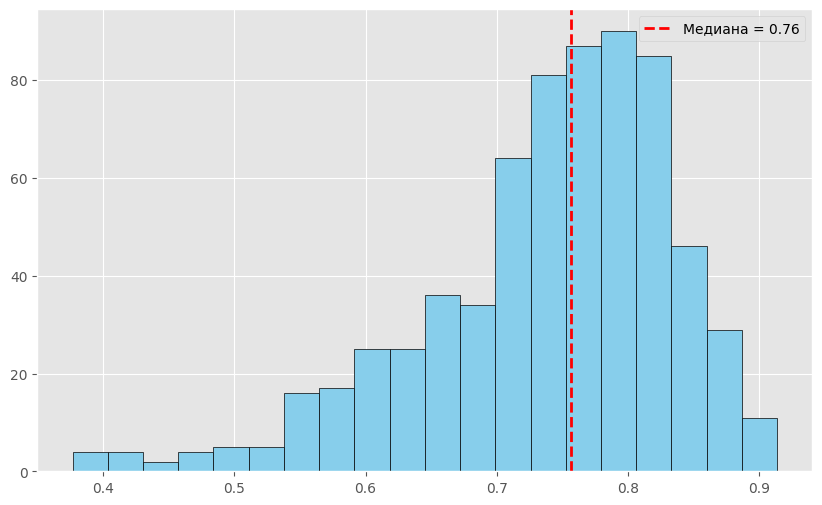

-1.0395244066478442


In [18]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

ans4 = ...
ans5 = ...

# your code here

ans4 = filtered_players['mean'].median()
ans5 = filtered_players['mean'].skew()

plt.figure(figsize=(10, 6))
plt.hist(filtered_players['mean'], bins=20, color='skyblue', edgecolor='black')
plt.axvline(ans4, color='red', linestyle='--', linewidth=2, label=f'Медиана = {ans4:.2f}')
plt.legend()
plt.grid(True)
plt.show()

print(ans5)

Распределение скошенно влево

In [19]:
# проверка того, что задание решено верно
assert ans4 > 0.7
assert ans5 < -1

# Другие подобные тесты скрыты от вас

# 2. Игры дома и в гостях

Проанализируем, как часто игроки попадают в корзину дома и как часто в гостях. Подсчитайте доли попаданий в корзину в гостях и дома для всех ироков из выборки. Если для какого-то игрока оказывается, что он всегда играл только дома/только в гостях, удалите его из выборки.

Проверьте гипотезу о равенстве этих долей для каждого игрока против двусторонней альтернативы. Число гипотез, которые отклоняются на уровне значимости $5\%$,  запишите в переменную `ans6`. 

In [9]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

ans6 = ...
# ans6 = (dff.pvalue < 0.05).sum()

# your code here

home = df[df['is_home']].groupby('player')['shot_made'].agg(['sum', 'count'])
away = df[~df['is_home']].groupby('player')['shot_made'].agg(['sum', 'count'])

merged = home.merge(away, on='player', suffixes=('_home', '_away')).dropna()

from statsmodels.stats.proportion import proportions_ztest
p_values = []
for idx, row in merged.iterrows():
    successes = [row['sum_home'], row['sum_away']]
    counts = [row['count_home'], row['count_away']]
    _, p = proportions_ztest(successes, counts)
    p_values.append(p)
merged['pvalue'] = p_values

from statsmodels.stats.multitest import multipletests
_, merged['pholm'], _, _ = multipletests(merged['pvalue'], method='holm')
_, merged['pbh'], _, _ = multipletests(merged['pvalue'], method='fdr_bh')

ans6 = (merged['pvalue'] < 0.05).sum()

c:\Python312\Lib\site-packages\statsmodels\stats\weightstats.py:792: RuntimeWarning: invalid value encountered in scalar divide
  zstat = value / std


In [10]:
# проверка того, что задание решено верно
assert ans6 < 100
assert ans6 > 60

# другие подобные тесты скрыты от вас

Введите коррекцию с помощью метода Холма. Запишите число гипотез, которые были отклонены на уровне значимости $5\%$, в переменную `ans7`.

In [11]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

ans7 = ...
# ans7 = (dff.pholm < 0.05).sum()

# your code here

ans7 = (merged['pholm'] < 0.05).sum()

Введите коррекцию с помощью метода Бенжамини-Хохберга. Запишите число гипотез, которые были отклонены на уровне значимости $5\%$, в переменную `ans8`.

In [12]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

ans8 = ...
# ans8 = (dff.pbh < 0.05).sum()

# your code here

ans8 = (merged['pbh'] < 0.05).sum()

In [13]:
# проверка того, что задание решено верно
assert ans7 < 10
assert ans8 < 10

# другие подобные тесты скрыты от вас

Объясните разницу, которую вы получили в количестве отклоненных гипотез. Предположим, что вы менеджер команды и вы хотите на основе статистики принять решение о том, какие игроки должны играть на поле в домашнем матче. Как вы будете его принимать? 

Отсортируйте таблицу по `pvalue`, полученному из самого первого теста. Посмотрите на самые большие и самые маленькие значения. Какое число наблюдений им соотвествуте? Как думаете, почему гипотезы для маленького числа наблюдений не отвергаются? Как это связано с ЗБЧ? Можно ли доверять этим результатам? Как их можно было бы решить при предобработке данных? 

In [20]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here

sorted_results = merged[merged['pvalue'] >= 0].sort_values('pvalue')
sorted_results.head()

,sum_home,count_home,sum_away,count_away,pvalue,pholm,pbh
player,,,,,,,
Jahlil Okafor,83,105,50,89,0.000630,0.647502,NaN
Andrew Bogut,300,612,419,718,0.000660,0.678217,NaN
Jamario Moon,70,101,117,134,0.000700,0.718421,NaN
Draymond Green,305,465,358,477,0.001474,1.000000,NaN
John Henson,171,282,127,267,0.002118,1.000000,NaN


In [21]:
sorted_results.tail()

,sum_home,count_home,sum_away,count_away,pvalue,pholm,pbh
player,,,,,,,
Mickell Gladness,4,8,2,4,1.0,1.0,NaN
Marshon Brooks,5,6,10,12,1.0,1.0,NaN
Marcus Vinicius,5,9,5,9,1.0,1.0,NaN
Slava Kravtsov,3,6,1,2,1.0,1.0,NaN
Tornike Shengelia,6,12,6,12,1.0,1.0,NaN


- При малом числе наблюдений статистическая мощность теста крайне низка. Даже если разница в долях существует, тест не может её обнаружить из-за недостатка данных. Например, для Mickell Gladness разница между 4/8 и 2/4 формально отсутствует (обе доли = 0.5)
- ЗБЧ утверждает, что с ростом объёма выборки выборочные оценки стремятся к истинным параметрам. При малых выборках оценки долей имеют высокую дисперсию, что делает их ненадёжными. Например, доля 2/4 может колебаться от 0 до 1 при добавлении всего одного броска.
- Результатам с малым числом наблюдений (напр., ≤10 бросков) доверять нельзя. Они чувствительны к случайным колебаниям и не отражают устойчивых закономерностей.
- Решение предобработки — фильтрация данных по объёму выборки (напр., учитывать только игорков с >30 бросками)

# 3. Постоянство - признак мастерства

__Решение задач из этого пункта является не обязательным и никак не влияет на вашу оценку.__ 

В наших данных есть несколько сезонов. Постройте гистограмму с распределением числа игр по каждому году. Видна ли на гистограмме [аномалия, произошедшая в $2011$ году?](https://en.wikipedia.org/wiki/2011_NBA_lockout) 

Text(0.5, 1.0, 'Распределение игр по сезонам')

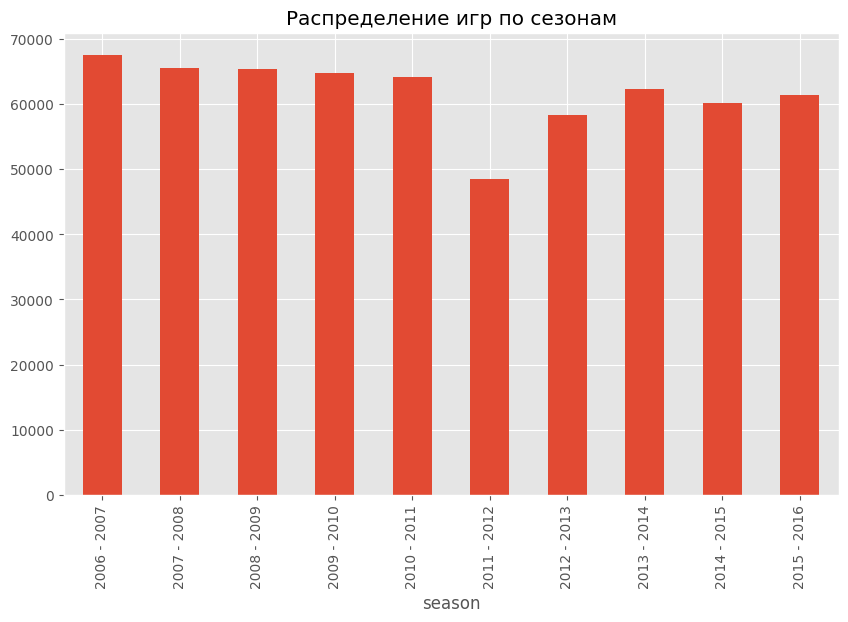

In [26]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here

plt.figure(figsize=(10, 6))
df['season'].value_counts().sort_index().plot(kind='bar')
plt.title('Распределение игр по сезонам')

- Посчитайте для каждого игрока по каждому сезону долю попаданий в кольцо и количество сделанных бросков. 
- Оставьте в данных только те строки, где было сделано как минимум сто бросков. Удалите колонку с количеством сделанных бросков. 
- Методом `unstack("player")` вытащите индексы, отвечающие в группировке за игроков в названия столбцов. Методом `droplevel()` удалите все лишние заголовки таблицы.
- Удалите из данных всех игроков, у которых пропущена статистика хотя бы по одному сезону.

In [27]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

shooting_per_season = ...

# your code here

season_stats = df.groupby(['season', 'player']).agg(p=('shot_made', 'mean'), n=('shot_made', 'count'))
season_stats = season_stats[season_stats['n'] >= 100].drop(columns='n')
shooting_per_season = season_stats.unstack('player').droplevel(0, axis=1).dropna(axis=1)

In [28]:
assert shooting_per_season.shape == (10, 27)

Посчтитайте для всех игроков стандартное отклонение их доли попаданий в динамике по сезонам. 

In [29]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here

std_dev = shooting_per_season.std().sort_values()

Постройте для $3$ самых непредсказуемых игроков и для трёх самых предсказуемых игроков динамику доли их попаданий по сезонам (по оси $x$ сезоны, по оси $y$ доля попаданий). 

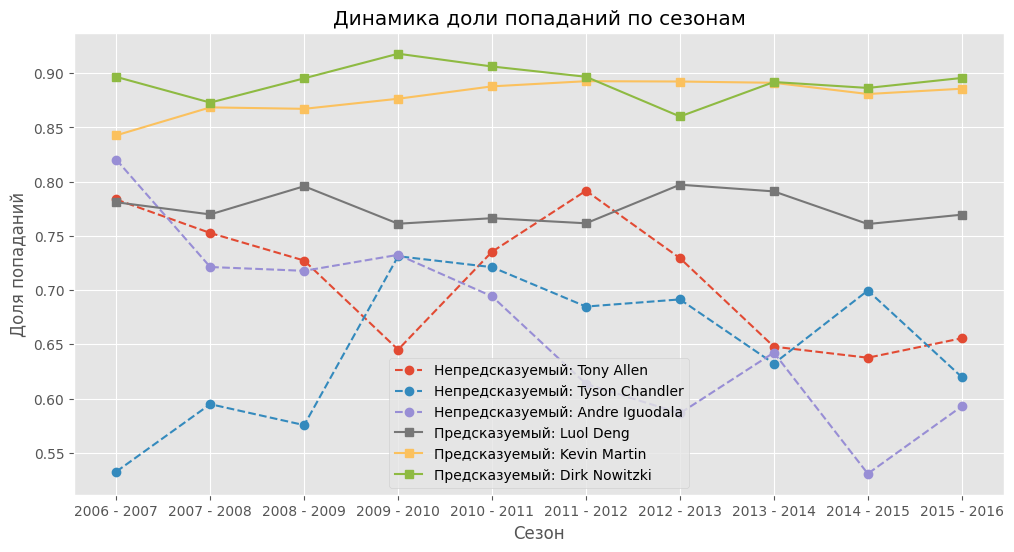

In [31]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here

top3_unpredictable = std_dev.tail(3).index.tolist()
top3_predictable = std_dev.head(3).index.tolist()
plt.figure(figsize=(12, 6))
for player in top3_unpredictable:
    plt.plot(shooting_per_season.index, shooting_per_season[player], marker='o', linestyle='--', label=f'Непредсказуемый: {player}')

for player in top3_predictable:
    plt.plot(shooting_per_season.index, shooting_per_season[player], marker='s', linestyle='-', label=f'Предсказуемый: {player}')

plt.xlabel('Сезон')
plt.ylabel('Доля попаданий')
plt.title('Динамика доли попаданий по сезонам')
plt.legend()
plt.grid(True)
plt.show()

Каких игроков из представленных вы бы предпочли взять к себе в команду? Кому бы вы предпочли доверить делать штрафные броски? Почему? 

Логичнее всего брать в команду предсказуемых игроков с высокой долей попаданий и штрафные броски доверять лучшем из них: Dirk Nowitzki и Kevin Martin

# 4. Эффект победителя

__Решение задач из этого пункта является не обязательным и никак не влияет на вашу оценку.__ 

__Гипотеза:__

> Если мы попали в корзину, сделав первый штрафной бросок, вероятность попасть при втором штрафном выше, чем если бы мы промахнулись.

Проверим эту гипотезу. 

- Создадим в исходной таблице колонку `shot_made_previous` методом `shift()`. В ней будет записан результат предыдущего броска. Данные отсортированы по времени.
- Извлечём из данных в таблицу `winner_effect` все строки, где в колонке `play` находится одна из записей: `"2 of 2", "2 of 3", "3 of 3"`. Каждая из них означает, что предыдущий бросок был сделан успешно. Этот же срез выбросит из таблицы все строки, где сдвиг, сделанный в предыдущем пункте, привёл к появлению некорректных записей.  

In [ ]:
df["shot_made_previous"] = df.shot_made.shift()

winner_effect = df[(df.play.str.contains("2 of 2")) |
                   (df.play.str.contains("2 of 3")) | 
                   (df.play.str.contains("3 of 3"))]

По аналогии с пунктом $2$ найдите вероятность попасть в корзину при условии, что первый бросок был успешен, и вероятность попасть, при условии, что первый бросок был неуспешен. 

- Всех игроков с оценкой только одной из вероятностей удалите из данных.
- Всех игроков, у которых было меньше $10$ успешных первых бросков либо проваленных первых бросков, также удалите.

Для каждого игрока проверьте гипотезу о том, что эти две вероятности совпадают. Используйте уровень значимости $5\%$. Для коррекции уровня значимости используйте методы Холма и Бенжамини-Хохберга. Для скольких игроков гипотеза об эффекте победителя не отвергается?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here


In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here


Посмотрите на таблицу значимых по Бенжамини-Хохбергу эффектов. Какие из них на ваш взгляд являются существенными? Не допустили ли мы в этих ситуациях ошибку второго рода?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here
